In [ ]:
import sys
sys.path.insert(0, '..') # krystal package is 1 level down

In [2]:
from krystal import imagetrans as it

In [3]:
from pathlib import Path

In [4]:
from krystal import imagetrans as kt

In [5]:
import numpy as np

In [6]:
bpath  = Path("../data") ; bpath

PosixPath('../data')

In [7]:
from krystal import image as kim

In [8]:
im = kim.imread(bpath / "images1" / "mushrooms.jpg")

In [9]:
type(im), im.shape

(numpy.ndarray, (433, 650, 3))

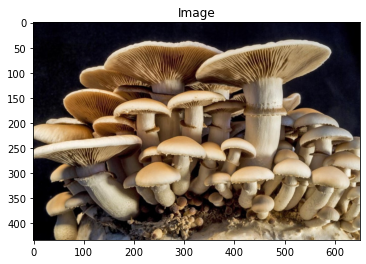

In [10]:
kim.imshow(im)

In [11]:
cr1 = kt.hcrop(im) ; cr1

array([[ 88,   0],
       [ 88, 197],
       [ 88, 394]])

> To create a list of np arrays instead: https://stackoverflow.com/questions/22392497/how-to-add-a-new-row-to-an-empty-numpy-array

In [12]:
cr2 = kt.vcrop(im) ; cr2

array([[  0, 197],
       [ 88, 197],
       [177, 197]])

In [13]:
help(kt.gridcrop)

Help on function gridcrop in module krystal.imagetrans:

gridcrop(im, t=256, crop_count=None)
     Crops an image using a grid pattern and returns the resulting 
     top left coords for cropping it later.
     Input image should be of shape h, w, d or h, w
     Parameters
     ----------
     im : numpy.ndarray
         Format h, w, d or h, w
     t : int
         Target size
     crop_count: tuple (int, int) (optional)
         Optimal crop count is calculated based on image and target sizes and 
         used by default.
         Target count in the format (rows x cols) in the resulting grid. 
         Note: Using an odd number count gives the center.
     Returns
     -------
     coords : python array
         Array of topleft coords that can be used to generate crops
     See Also
     --------
     vcrop, hcrop
     Examples
     --------
    crg1 = kt.gridcrop(im, 128, (3, 5)) ; crg1
    [[0, 0],
      [0, 261],
      [0, 522],
      [76, 0],
      [76, 261],
      [76, 522],
 

In [14]:
imlist = kt.imgcut(im, 256, cr1, cr2) ; len(imlist)

6

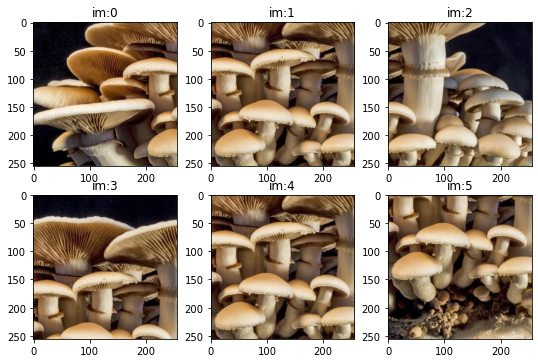

In [15]:
kim.imgrid(imlist, 3, 3, 30)

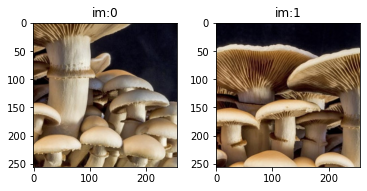

In [16]:
kim.imgrid(imlist[2:4], 2, 3, 30)

In [17]:
t = 300
crg1,__ = kt.gridcrop(im, t) ; crg1

[[0, 0], [0, 349], [133, 0], [133, 349]]

In [18]:
crg1,cropcount = kt.gridcrop(im, t) ; crg1, cropcount

([[0, 0], [0, 349], [133, 0], [133, 349]], (2, 1, False, True))

Further slices from the result can give horizontal, vertical or diagonal strips from the grid

In [19]:
crg1[:3]

[[0, 0], [0, 349], [133, 0]]

In [20]:
crg1[3*2:3*2+3]

[]

In [21]:
crg1[::5]

[[0, 0]]

In [22]:
kt.find_optimalcropcount(im, t), im.shape

((2, 1, False, True), (433, 650, 3))

In [23]:
imlist = kt.imgcut(im, t, crg1) ; len(imlist)

4

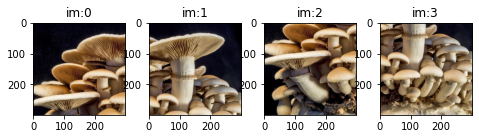

In [24]:
kim.imgrid(imlist, 5, 10, 20)